In [111]:
%pylab inline
from collections import Counter, defaultdict
import pandas as pd
import glob
import os
import itertools

import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('white')
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from ee546_utils import *

def do_PCA(X, target_names):
    pca = PCA(n_components=min(X.shape))

    X_r = pca.fit(X).transform(X)

    # Percentage of variance explained for each components
    print('explained variance ratio (first two components): %s'
          % str(pca.explained_variance_ratio_))

    fig, ax = plt.subplots(figsize=(10, 10))
    colors = sns.color_palette('Paired')
    lw = 2

    #for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    #ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
    #            label=target_name)
    colors = {}
    indexes = defaultdict(list)
    all_species = {}
    row_colors = []
    for index, target_name in enumerate(target_names):
        species = target_name.split('_')[0]
        tissue = target_name.split('_')[2]
        #if tissue == 'br':
        #    continue
        #if tissue == 'lv':
        #    continue
        if tissue not in colors.keys():
            colors[tissue] = sns.color_palette('tab20')[len(colors)]
        row_colors.append(colors[tissue])
        indexes[tissue].append(index)
        all_species[index] = species

    for tissue, values in indexes.items():
        #for index in 
        #sepcies =  all_species[]
        #if species == 'hsapiens':
        ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='o', label=tissue, lw=5)
        #else:
        #    ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='x', label=tissue, lw=3)
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title('PCA')
    fig.tight_layout()
    
    return X_r
    
def do_CCA(X, Y, target_names):
    colors = {}
    indexes_x = defaultdict(list)
    indexes_y = defaultdict(list)
    row_colors = []
    tissues = []
    for index, target_name in enumerate(target_names):
        species = target_name.split('_')[0]
        tissue = target_name.split('_')[2]
        #if tissue == 'br':
        #    continue
        #if tissue == 'lv':
        #    continue
        if tissue not in colors.keys():
            colors[tissue] = sns.color_palette('tab20')[len(colors)]
        row_colors.append(colors[tissue])
        if index < X.shape[0]:
            indexes_x[tissue].append(index)
        else:
            indexes_y[tissue].append(index-X.shape[0])
    cca = CCA(n_components=2)
    cca.fit(X, Y)
    X_c, Y_c = cca.transform(X, Y)
    fig, ax = plt.subplots(figsize=(8, 8))
    #assert 
    for tissue, values in indexes_x.items():
        #for index in 
        #sepcies =  all_species[]
        #if species == 'hsapiens':
        ax.scatter(X_c[values,0], X_c[values, 1], color=colors[tissue], marker='o', label=tissue, lw=5)
    
    for tissue, values in indexes_y.items():
        #for index in 
        #sepcies =  all_species[]
        #if species == 'hsapiens':
        ax.scatter(Y_c[values,0], Y_c[values, 1], color=colors[tissue], marker='o',  lw=5)
    """
    for index in range(X_c.shape[0]):
        tissue = tissues[index]
        ax.scatter(X_c[index, 0], X_c[index, 1], color=row_colors[index], label=tissue, marker='x', lw=8)
    for index in range(Y_c.shape[0]):
        tissue = tissues[index+X_c.shape[0]]
        ax.scatter(Y_c[index, 0], Y_c[index, 1], color=row_colors[index+X_c.shape[0]], marker='o', lw=8)
    """
    ax.legend(loc='best', shadow=False, scatterpoints=1)
    ax.set_title('CCA')
    fig.tight_layout()

Populating the interactive namespace from numpy and matplotlib


# 01. Read Data

In [5]:
ortho_pairwise = {}
for f in glob.glob('../ortholog_tsv/*.tsv'):
    if 'ortholog_one2one' in f:
        continue
    second_species = f.split('/')[-1].replace('.tsv', '').split('_')[-1]
    print(f)
    ortho_pairwise[f.split('/')[-1].replace('.tsv', '')] = pd.read_table(f)[['ensembl_gene_id', '{}_homolog_ensembl_gene'.format(second_species), '{}_homolog_orthology_type'.format(second_species)]].set_index('ensembl_gene_id')

../ortholog_tsv/mmusculus_btaurus.tsv
../ortholog_tsv/mmusculus_ggallus.tsv
../ortholog_tsv/mmusculus_ggorilla.tsv
../ortholog_tsv/mmusculus_hsapiens.tsv
../ortholog_tsv/mmusculus_mdomestica.tsv
../ortholog_tsv/mmusculus_mmulatta.tsv
../ortholog_tsv/mmusculus_oanatinus.tsv
../ortholog_tsv/mmusculus_pabelii.tsv
../ortholog_tsv/mmusculus_ppaniscus.tsv
../ortholog_tsv/mmusculus_ptroglodytes.tsv
../ortholog_tsv/mmusculus_rnorvegicus.tsv


In [44]:
ortho_pairwise['mmusculus_btaurus']

,btaurus_homolog_ensembl_gene,btaurus_homolog_orthology_type
ensembl_gene_id,,
ENSMUSG00000064370,ENSBTAG00000043550,ortholog_one2one
ENSMUSG00000064368,ENSBTAG00000043546,ortholog_one2one
ENSMUSG00000064367,ENSBTAG00000043563,ortholog_one2one
ENSMUSG00000064363,ENSBTAG00000043577,ortholog_one2one
ENSMUSG00000065947,ENSBTAG00000043559,ortholog_one2one
ENSMUSG00000064360,ENSBTAG00000043568,ortholog_one2one
ENSMUSG00000064358,ENSBTAG00000043560,ortholog_one2one
ENSMUSG00000064357,ENSBTAG00000043584,ortholog_one2one
ENSMUSG00000064356,ENSBTAG00000043564,ortholog_one2one


In [6]:
ONE2ONE_orthologs = pd.read_table('../ortholog_tsv/ortholog_one2one.tsv')

In [ ]:
'../cross-species-data/SRP016501_sample_info.tsv

# 02. Read kallisto tables SRP007412

In [30]:
kallisto_counts = {}
srp_species =  defaultdict(list)
for f in glob.glob('../cross-species-data/SRP007412-*_kallisto_gene_tables.tsv'):
    sample_name = f.split('/')[-1].replace('_kallisto_gene_tables.tsv', '')
    srp, species = sample_name.split('-')
    species = species[0] + species.split('_')[-1]
    kallisto_counts['{}_{}'.format(srp, species)] = pd.read_table(f)
    srp_species[srp].append(species)

# 03. Read kallisto tables SRP016501

In [31]:
for f in glob.glob('../cross-species-data/SRP016501-*_kallisto_gene_tables.tsv'):
    sample_name = f.split('/')[-1].replace('_kallisto_gene_tables.tsv', '')
    srp, species = sample_name.split('-')
    species = species[0] + species.split('_')[-1]
    kallisto_counts['{}_{}'.format(srp, species)] = pd.read_table(f)
    srp_species[srp].append(species)               

In [96]:
srp = 'SRP016501'
pairwise_kallisto_counts = {}
pairwise_kallisto_counts_normalized = {}
pairwise_kallisto_counts_normalized_individual = defaultdict(dict)
for species1, species2 in itertools.combinations(srp_species[srp], 2):
    # load counts
    counts1 = kallisto_counts['{}_{}'.format(srp, species1)]
    counts2 = kallisto_counts['{}_{}'.format(srp, species2)]
    
    if species1 ==  'mmusculus':
        species1, species2 = species2, species1
        counts1, counts2 = counts2, counts1
        #cols_to_use = counts1.columns.tolist()
        # Only use these columns in the second dataframe
        #counts2 = counts2.loc[:, cols_to_use]
    if species2 ==  'mmusculus':
        cols_to_use = counts2.columns.tolist()
        # Only use these columns in the second dataframe
        counts1 = counts1.loc[:, cols_to_use]
    print(species1, species2)
    if species2 != 'mmusculus':
        ortho1 = ortho_pairwise['mmusculus_{}'.format(species1)]
        ortho1 = ortho1.loc[ortho1['{}_homolog_orthology_type'.format(species1)]=='ortholog_one2one']
        ortho1 = ortho1.drop(columns=['{}_homolog_orthology_type'.format(species1)]) 
    
        ortho2 = ortho_pairwise['mmusculus_{}'.format(species2)]
        ortho2 = ortho2.loc[ortho2['{}_homolog_orthology_type'.format(species2)]=='ortholog_one2one']
        ortho2 = ortho2.drop(columns=['{}_homolog_orthology_type'.format(species2)]) 
        
        ortho_12 = ortho1.join(ortho2, how='outer').dropna().reset_index(drop=True)\
                    .set_index('{}_homolog_ensembl_gene'.format(species1))
        species2_lookup_col = '{}_homolog_ensembl_gene'.format(species2)
        species1_ortho_genes  = ortho_12.index
        species2_ortho_genes  = ortho_12['{}_homolog_ensembl_gene'.format(species2)]
        
        
        counts1_trimmed = counts1.loc[species1_ortho_genes].dropna()
        counts2_trimmed = counts2.loc[species2_ortho_genes].dropna()
    
        new_index_genes = counts1_trimmed.index
        reduced_set = ortho_12.loc[new_index_genes]
        reduced_set = reduced_set.loc[reduced_set[species2_lookup_col].isin(counts2_trimmed.index)]
        counts1_trimmed = counts1_trimmed.loc[reduced_set.index]
        counts2_trimmed = counts2_trimmed.loc[reduced_set[species2_lookup_col]]
        del ortho_12
        del reduced_set
        del ortho1
        del ortho2
    else:
        
        ortho = ortho_pairwise['mmusculus_{}'.format(species1)]
        ortho = ortho.loc[ortho['{}_homolog_orthology_type'.format(species1)]=='ortholog_one2one']
        ortho = ortho.drop(columns=['{}_homolog_orthology_type'.format(species1)]) 
        species2_lookup_col = '{}_homolog_ensembl_gene'.format(species1)

        species1_ortho_genes  = ortho['{}_homolog_ensembl_gene'.format(species1)]
        species2_ortho_genes  = ortho.index.tolist()
        
        counts1_trimmed = counts1.loc[species1_ortho_genes].dropna()
        counts2_trimmed = counts2.loc[species2_ortho_genes].dropna()
    
        new_index_genes = counts2_trimmed.index
        reduced_set = ortho.loc[new_index_genes]
        reduced_set = reduced_set.loc[reduced_set[species2_lookup_col].isin(counts1_trimmed.index)]
        counts1_trimmed = counts1_trimmed.loc[reduced_set[species2_lookup_col]]
        counts2_trimmed = counts2_trimmed.loc[reduced_set.index]                        
        del ortho
    if len(counts1.columns)!= len(counts2.columns):
        print('Skipping {}, {}'.format(species1, species2))
        continue
    assert (counts1.columns == counts2.columns).all()
    
    counts1_trimmed.columns =  ['{}_{}'.format(species1, x) for x in counts1_trimmed.columns]
    counts2_trimmed.columns =  ['{}_{}'.format(species2, x) for x in counts2_trimmed.columns]
    
    del counts1
    del counts2
    counts2_trimmed.index = counts1_trimmed.index.tolist()
    counts_concat = pd.concat([counts1_trimmed.T, counts2_trimmed.T], ignore_index=False)
    pairwise_kallisto_counts['{}_{}'.format(species1, species2)] = counts_concat
    
    counts_concat_centered = counts_concat.sub(counts_concat.mean(axis=1), axis=0)
    counts_concat_centered = counts_concat_centered.div(counts_concat_centered.std(axis=1), axis=0)
    
    pairwise_kallisto_counts_normalized['{}_{}'.format(species1, species2)] = counts_concat_centered
    pairwise_kallisto_counts_normalized_individual['{}_{}'.format(species1, species2)][species1] = counts_concat_centered.iloc[:len(counts1_trimmed.T.index),]
    pairwise_kallisto_counts_normalized_individual['{}_{}'.format(species1, species2)][species2] = counts_concat_centered.iloc[len(counts1_trimmed.T.index):,]

ggallus mmulatta
ggallus btaurus
ggallus mmusculus


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/ipykernel/__main__.py:37: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/ipykernel/__main__.py:38: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/ipykernel/__main__.py:59: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the fu

ggallus rnorvegicus
mmulatta btaurus
mmulatta mmusculus
mmulatta rnorvegicus
btaurus mmusculus
btaurus rnorvegicus
rnorvegicus mmusculus


explained variance ratio (first two components): [0.6093339  0.25583032]


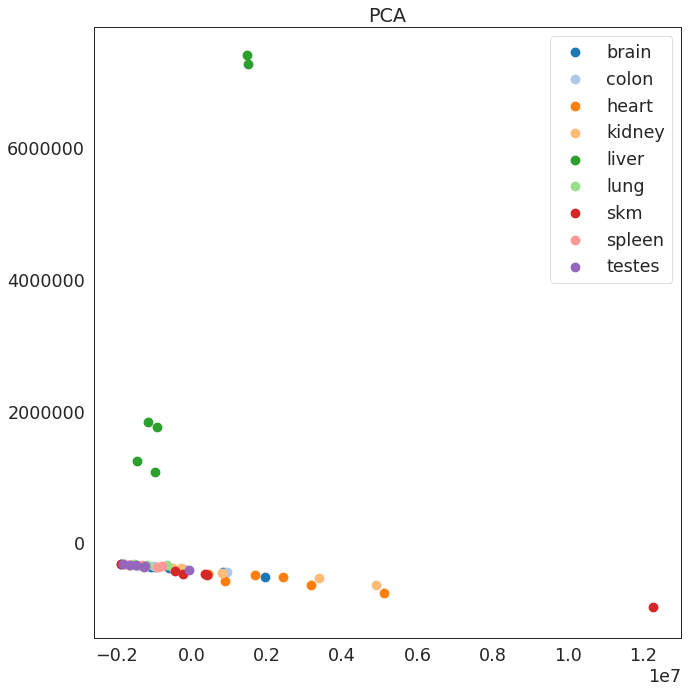

In [109]:
X = pairwise_kallisto_counts['ggallus_mmulatta'].values
target_names = pairwise_kallisto_counts['ggallus_mmulatta'].index
do_PCA(X, target_names)

explained variance ratio (first two components): [2.90077072e-01 1.76567163e-01 1.04805534e-01 8.56671841e-02
 7.51156118e-02 6.25027818e-02 3.84854914e-02 2.89381864e-02
 2.37866017e-02 1.34651320e-02 1.21193161e-02 1.11703653e-02
 9.49058669e-03 8.50506668e-03 8.09064943e-03 6.48475819e-03
 5.05768049e-03 4.90674062e-03 4.30606773e-03 3.69354218e-03
 3.42373777e-03 3.12842529e-03 2.93293839e-03 2.48490486e-03
 2.04156933e-03 1.70011308e-03 1.46995856e-03 1.20183111e-03
 1.03669711e-03 9.16893115e-04 8.64751719e-04 7.04536209e-04
 6.41090633e-04 5.89572756e-04 5.29704019e-04 3.89373521e-04
 3.67457313e-04 2.99240891e-04 2.78288357e-04 2.62533649e-04
 2.36543673e-04 2.04662563e-04 1.62349296e-04 1.54922633e-04
 1.24990044e-04 1.20604356e-04 1.07752782e-04 1.04287784e-04
 8.01307004e-05 7.42342091e-05 6.86635221e-05 4.86525515e-05
 1.30560937e-05 5.72076154e-32]


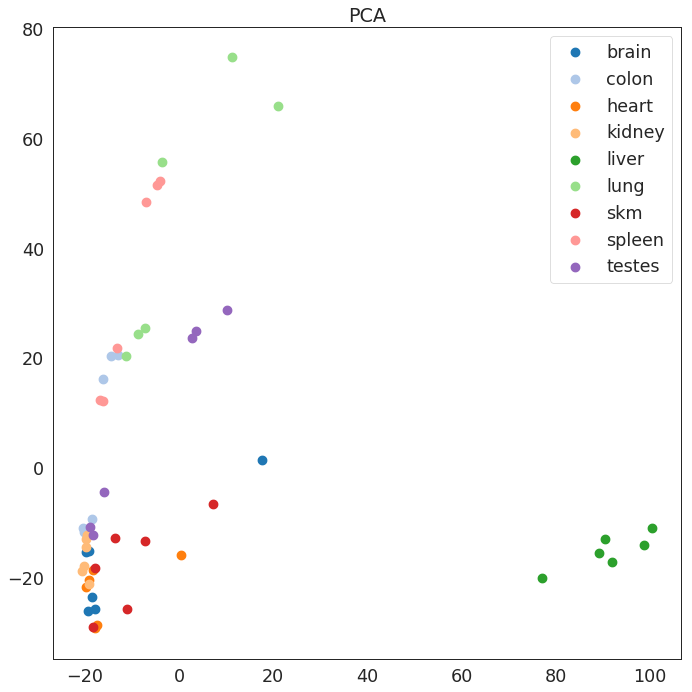

In [112]:
X = pairwise_kallisto_counts_normalized['ggallus_mmulatta'].values
target_names = pairwise_kallisto_counts_normalized['ggallus_mmulatta'].index
X_r = do_PCA(X, target_names)

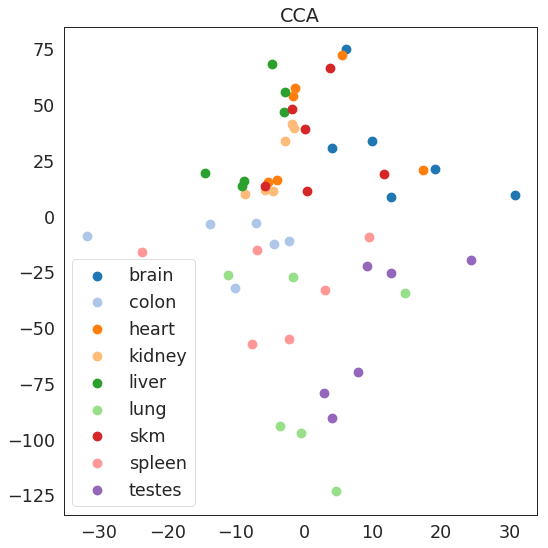

In [108]:
X = pairwise_kallisto_counts_normalized_individual['ggallus_mmulatta']['ggallus']
Y = pairwise_kallisto_counts_normalized_individual['ggallus_mmulatta']['mmulatta'] 
do_CCA(X, Y, target_names)


In [114]:
X_r.shape

(54, 54)

In [115]:
X.shape[0]

54

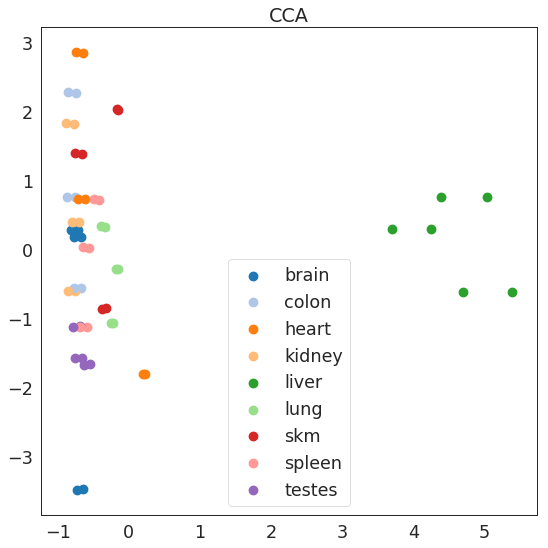

In [116]:
X = pairwise_kallisto_counts_normalized_individual['ggallus_mmulatta']['ggallus']

X = X_r[:X.shape[0],]
Y = X_r[X.shape[0]:,]
do_CCA(X, Y, target_names)


explained variance ratio (first two components): [6.09333905e-01 2.55830319e-01 4.64313760e-02 3.34275069e-02
 1.22705213e-02 9.00886635e-03 6.62654090e-03 4.25815139e-03
 3.16666973e-03 3.09783491e-03 2.69975400e-03 1.86811984e-03
 1.66895853e-03 1.50002108e-03 1.43541902e-03 1.35962214e-03
 1.07955133e-03 9.46849618e-04 7.50115489e-04 7.04774370e-04
 5.56462007e-04 5.23796229e-04 3.46045611e-04 1.63258326e-04
 1.53112837e-04 1.35551352e-04 1.14566416e-04 9.69506006e-05
 6.68139774e-05 5.87254130e-05 4.25917299e-05 3.91467146e-05
 3.33627050e-05 3.03101388e-05 2.76348937e-05 2.23609557e-05
 1.84703961e-05 1.59213434e-05 1.43167630e-05 1.30905451e-05
 1.18062655e-05 9.39215278e-06 8.84825904e-06 7.23898840e-06
 5.06426301e-06 4.30181372e-06 3.53749878e-06 3.35982168e-06
 2.70705145e-06 2.37572144e-06 1.98817929e-06 1.91638508e-06
 9.83743917e-08 1.12041638e-32]


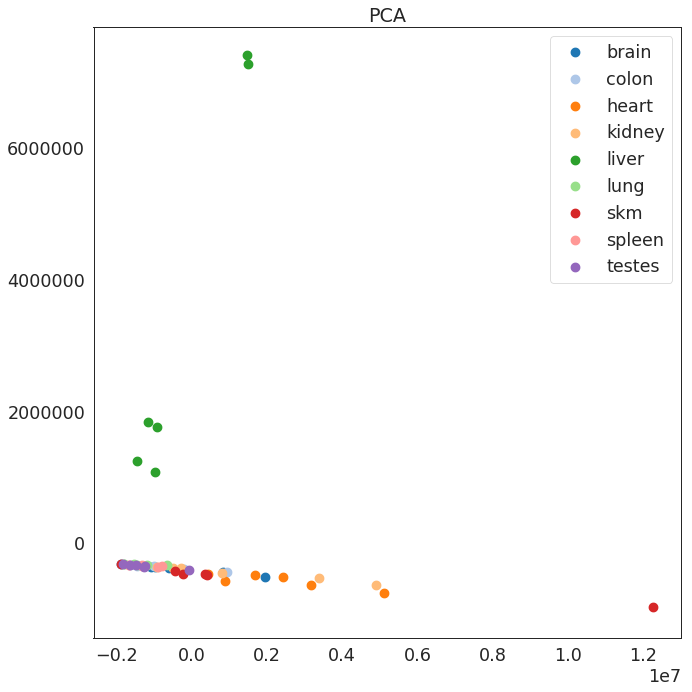

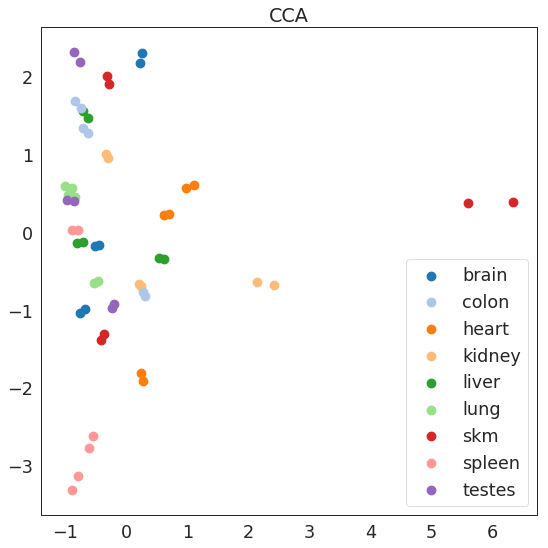

In [117]:
X = pairwise_kallisto_counts['ggallus_mmulatta'].values
target_names = pairwise_kallisto_counts['ggallus_mmulatta'].index
X_r = do_PCA(X, target_names) 

X = pairwise_kallisto_counts_normalized_individual['ggallus_mmulatta']['ggallus']

X = X_r[:X.shape[0],]
Y = X_r[X.shape[0]:,]
do_CCA(X, Y, target_names)
